In [29]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
del data['customerID']

In [8]:
gender_map = {
    "Female": 0,
    "Male": 1
}

yes_no_map = {
    "Yes": 1,
    "No": 0
}

data['gender'] = data['gender'].map(gender_map)

def binary_encode(features):
    for feature in features:
        data[feature] =  data[feature].map(yes_no_map)

In [9]:
binary_encode_candidates = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidates)

In [10]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')


In [11]:
print(data.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",data["TotalCharges"].isnull().sum())

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# of Null values in 'TotalCharges`:  11


In [12]:
data =  pd.get_dummies(data)

In [13]:
data["TotalCharges"].fillna(data["TotalCharges"].mean(), inplace=True)

In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


### Feature Selection

In [18]:
result = pd.DataFrame(columns=['Features', 'Chi2Weights'])

for i in range(len(data.columns)):
    chi2, p = chisquare(data[data.columns[i]])
    result = result.append([pd.Series([data.columns[i], chi2], index=result.columns)], ignore_index=True)

In [23]:
result = result.sort_values(by='Chi2Weights', ascending=False)

In [24]:
result.head(20)

,Features,Chi2Weights
8,TotalCharges,1.582229e+07
4,tenure,1.312128e+05
7,MonthlyCharges,9.845178e+04
11,MultipleLines_No phone service,6.361000e+03
1,SeniorCitizen,5.901000e+03
35,Contract_One year,5.570000e+03
38,PaymentMethod_Credit card (automatic),5.521000e+03
20,OnlineBackup_No internet service,5.517000e+03
15,InternetService_No,5.517000e+03
32,StreamingMovies_No internet service,5.517000e+03


In [26]:
new_df = data[result["Features"].head(20)]

In [27]:
new_df.head()

,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),OnlineBackup_No internet service,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1889.50,34,56.95,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,108.15,2,53.85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1840.75,45,42.30,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,151.65,2,70.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Finding correlations

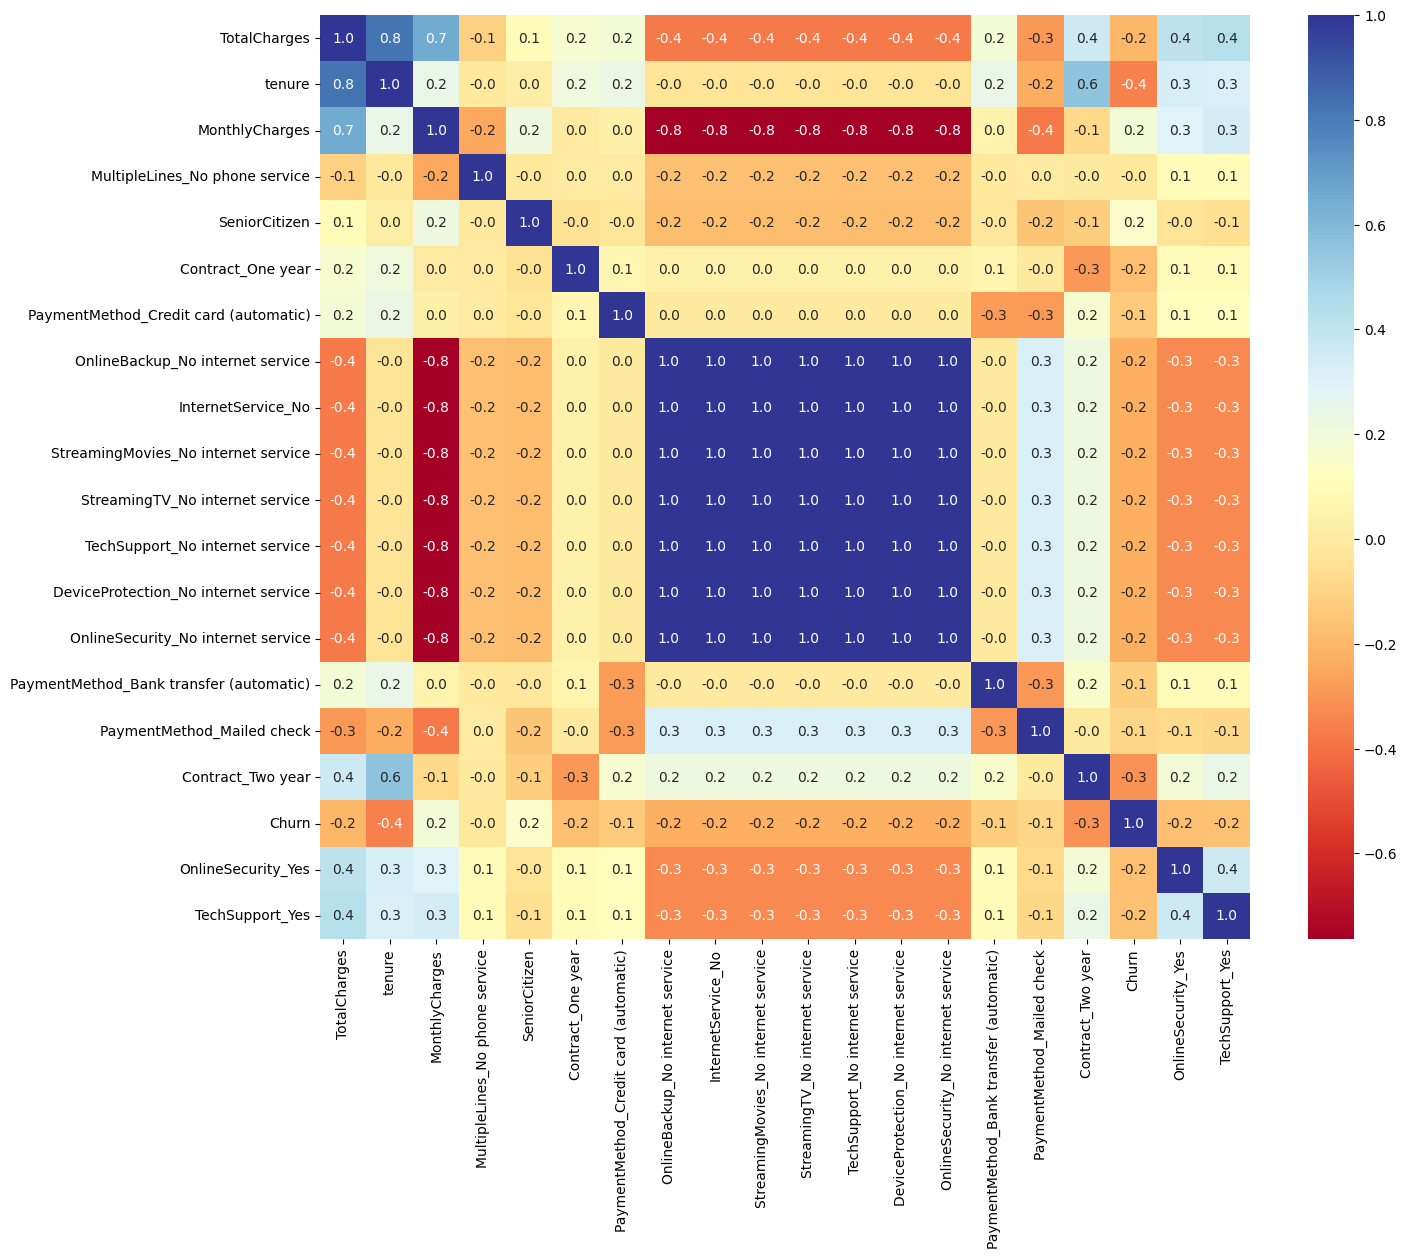

In [31]:
plt.figure(figsize= (15, 12))
sns.heatmap(new_df.corr(), cmap='RdYlBu', annot=True, fmt='.1f')
plt.show()

In [33]:
hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", 
"TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

def remove_corr_features(features):
    for feature in features:
        del new_df[feature]

In [34]:
remove_corr_features(hightly_corr_feature)

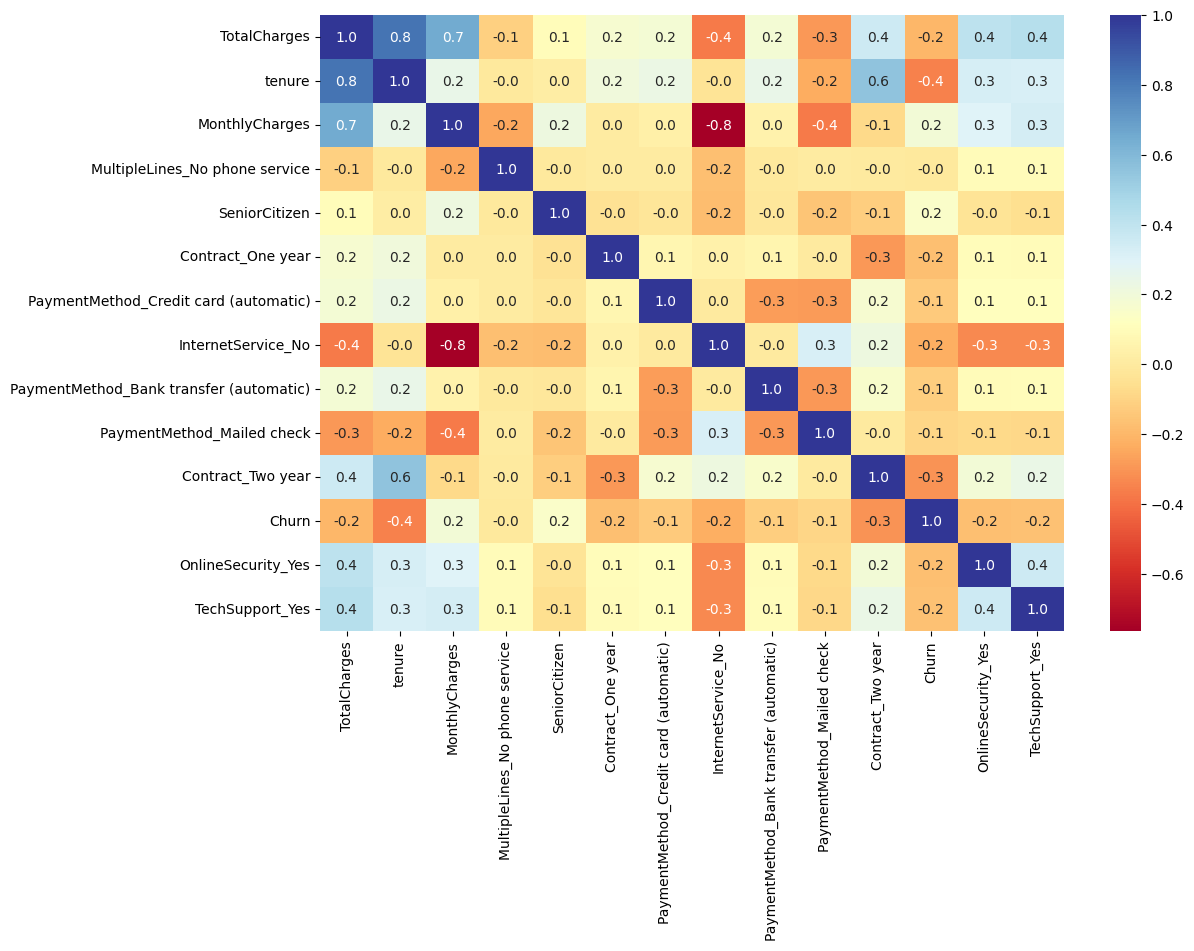

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), cmap='RdYlBu', annot=True, fmt='.1f')
plt.show()

In [37]:
new_df.columns

Index(['TotalCharges', 'tenure', 'MonthlyCharges',
       'MultipleLines_No phone service', 'SeniorCitizen', 'Contract_One year',
       'PaymentMethod_Credit card (automatic)', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'Contract_Two year', 'Churn', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [39]:
new_df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

### Data Visualization

<AxesSubplot: xlabel='MonthlyCharges', ylabel='tenure'>

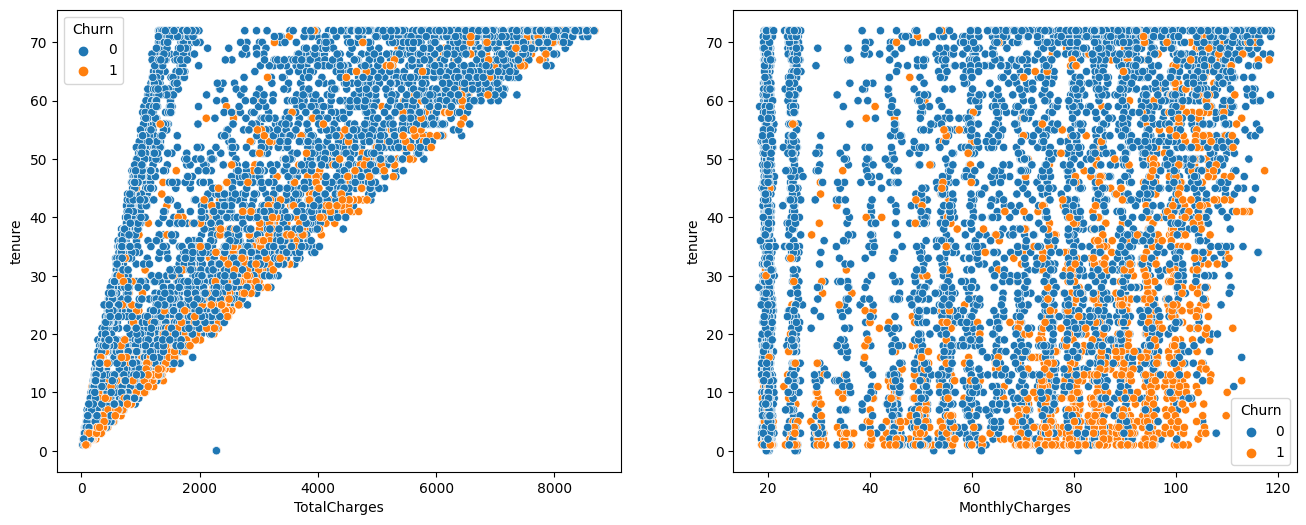

In [41]:
_, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='TotalCharges', y = 'tenure', hue = 'Churn', data=new_df, ax=ax[0])
sns.scatterplot(x='MonthlyCharges', y = 'tenure', hue = 'Churn', data=new_df, ax=ax[1])